<h2>LENDING CLUB CASE STUDY</h2> 

- Lending Club offers loans to borrowers, but many borrowers default, meaning they don't repay the borrowed amount and the interest.
- These defaults cause financial losses for businesses or lenders. 
- Therefore, the goal of this case study is to identify key factors that can help predict which borrowers are more likely to default. 
- In this case study, we have analyzed the data to identify and report some of these important factors.

*** Analysis By Sri Priya Valluru and Priya Sharma ***









<h3>Understanding Data dictionary</h3>

<h5>Target Variable/Column - "loan_status":</h5>

The "loan_status" column has three distinct values
- Fully-Paid - The customer who has successfully paid the loan
- Charged-Off - The customer is "Charged-Off" which also means "Defaulted"
- Current - The Customers whose loan is currently in progress which means neither defaulted nor fully paid.

In [43]:
#Importing libraries and filtering warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [44]:
#Read the dataset and display head rows
loan_data = pd.read_csv("loan.csv")
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [45]:
#Checking the shape of the dataframe
loan_data.shape

(39717, 111)

- There are 39717 rows and 111 columns

In [46]:
#Checking info
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [47]:
# Checking the number of null values in the columns
loan_data.isnull().sum().sort_values(ascending=False)

verification_status_joint    39717
annual_inc_joint             39717
mo_sin_old_rev_tl_op         39717
mo_sin_old_il_acct           39717
bc_util                      39717
                             ...  
delinq_amnt                      0
policy_code                      0
earliest_cr_line                 0
delinq_2yrs                      0
id                               0
Length: 111, dtype: int64

In [48]:
# Dropping those columns which have entire rows as null values
loan_data=loan_data.dropna(axis=1,how="all")

In [49]:
#Checking the Shape and columns again
print(loan_data.shape)
print(loan_data.columns)

(39717, 57)
Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',


- There are 39717 rows and 57 columns now.

In [50]:
# Calculating the percentage of missing values for every column
round(100*(loan_data.isnull().sum()/len(loan_data.index)), 2).sort_values(ascending=False)

next_pymnt_d                  97.13
mths_since_last_record        92.99
mths_since_last_delinq        64.66
desc                          32.59
emp_title                      6.19
emp_length                     2.71
pub_rec_bankruptcies           1.75
last_pymnt_d                   0.18
chargeoff_within_12_mths       0.14
collections_12_mths_ex_med     0.14
revol_util                     0.13
tax_liens                      0.10
title                          0.03
last_credit_pull_d             0.01
home_ownership                 0.00
int_rate                       0.00
out_prncp_inv                  0.00
total_pymnt                    0.00
total_pymnt_inv                0.00
total_rec_prncp                0.00
total_rec_int                  0.00
total_rec_late_fee             0.00
recoveries                     0.00
collection_recovery_fee        0.00
term                           0.00
last_pymnt_amnt                0.00
initial_list_status            0.00
funded_amnt_inv             

- Looking at the data dictionary and the dataset of null values or zeroes in the whole column, listing few columns which are not required for analysis. 
- Present Columns from loan_data dataframe - <br>
    ['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_liens']

Columns that are important factors from the above:      
- id - Currently, we don't need for analysis. If the analysis needs to be done for the past customers, then we can take this variable into consideration. (Not considering)
- member_id - Same as id column, it is unique (Not considering)
- loan_amnt - It can be one of the important derived variable to identify the correlation b/w the loan_amnt and loan_status column.
- funded_amnt - same as loan_amnt column
- funded_amnt_inv - same as loan_amnt column 
- term - As it is a categorical variable, we can do some analysis
- int_rate - Interest rates are important and we can analyse correlation b/w this column and other columns, how they are varying.
- installment - Can Analyse to see if we have any relation w.r.t other columns
- grade - Can analyse based on count/frequency.
- sub_grade - Eliminating this, cause we are considering the grade column already.
- emp_title - Description (Not considering)
- emp_length - Can Analyse this variable
- home_ownership - One of the important factor for analysis
- annual_inc - One of the important factor and can be considered for analysis
- verification_status - Considering it to analyse
- issue_d - Can analyse the months in which loan amount is funded.
- loan_status - Target Variable
- pymnt_plan - The values are same for every row, not useful (Not Considering)
- url - Not useful (Not considering)
- desc - Not useful right now (Not considering)
- purpose - Purpose why the loan was took can be the important factor in analysing.
- title - There are many unique values, hence (Not considering)
- zip_code - Not useful(Not Considering)
- addr_state - Can analyse the states.
- dti - Can analyse the correlation wrt other columns
- delinq_2yrs - This is the factor taken into consideration post approval of loan(Not Considering)
- earliest_cr_line - Same as delinq_2yrs (Not considering)
- inq_last_6mths - Same as above (Not considering)
- mths_since_last_delinq - Dropping it because of more null value percentage.
- mths_since_last_record - Dropping it, 92% of null values were there (Not considering)
- open_acc - post approval (Not considering)
- pub_rec - post approval (Not considering)
- revol_bal - Can help in future cases
-revol_util - Can help in future cases
- total_acc - Can help in future cases
- initial_list_status, 
'out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp',
'total_rec_int', 'total_rec_late_fee','recoveries' ,'collection_recovery_fee'
'last_pymnt_d', 
'last_pymnt_amnt',
'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
'policy_code', 'application_type' 'acc_now_delinq' - Not Considering them as all of them are put up in data once the customer takes the loan.
- 'chargeoff_within_12_mths'- Considering it 
- 'delinq_amnt', 
- 'pub_rec_bankruptcies' - Considering it for analysis
- tax_liens - (Not Considering it as all of them are null)

In [51]:
# After understanding data dictionary, Columns that are not considered for analysis
not_considered_cols = [
    'id',
    'member_id',
    'sub_grade',
    'emp_title',
    'pymnt_plan',
    'url',
    'desc',
    'title',
    'zip_code',
    'delinq_2yrs',
    'earliest_cr_line',
    'inq_last_6mths',
    'mths_since_last_delinq',
    'mths_since_last_record',
    'open_acc',
    'pub_rec',
    'initial_list_status',
    'out_prncp',
    'out_prncp_inv',
    'total_pymnt',
    'total_pymnt_inv',
    'total_rec_prncp',
    'total_rec_int',
    'total_rec_late_fee',
    'recoveries',
    'collection_recovery_fee',
    'last_pymnt_d',
    'next_pymnt_d',
    'last_credit_pull_d',
    'collections_12_mths_ex_med',
    'policy_code',
    'application_type',
    'acc_now_delinq',
    'tax_liens'
]

In [52]:
#Dropping the not_considered_cols and re-checking the shape of dataframe, columns that are available
loan_data.drop(not_considered_cols, axis=1,inplace=True)
print(loan_data.shape)
print(loan_data.columns)

(39717, 23)
Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'revol_bal', 'revol_util', 'total_acc',
       'last_pymnt_amnt', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies'],
      dtype='object')


In [53]:
# Chceking the null value percentage again
round(100*(loan_data.isnull().sum()/len(loan_data.index)), 2).sort_values(ascending=False)

emp_length                  2.71
pub_rec_bankruptcies        1.75
chargeoff_within_12_mths    0.14
revol_util                  0.13
loan_status                 0.00
delinq_amnt                 0.00
last_pymnt_amnt             0.00
total_acc                   0.00
revol_bal                   0.00
dti                         0.00
addr_state                  0.00
purpose                     0.00
loan_amnt                   0.00
funded_amnt                 0.00
verification_status         0.00
annual_inc                  0.00
home_ownership              0.00
grade                       0.00
installment                 0.00
int_rate                    0.00
term                        0.00
funded_amnt_inv             0.00
issue_d                     0.00
dtype: float64

In [54]:
# Cleaning emp_length column
loan_data["emp_length"].value_counts()

import re
def clean_emp_length(x):
    x = re.sub(r"years|year|\+", "", x)
    # replacing < 1 year to 0 
    x = x.replace("< 1", "0")
    return x
loan_data['emp_length'].fillna('0', inplace=True)  # Impute missing values with '0' (string)
loan_data["emp_length"] = loan_data["emp_length"].apply(clean_emp_length).astype("int32")
loan_data["emp_length"].value_counts()

emp_length
10    8879
0     5658
2     4388
3     4095
4     3436
5     3282
1     3240
6     2229
7     1773
8     1479
9     1258
Name: count, dtype: int64

In [55]:
#Considering columns having <=2% null values to drop their respective rows, as that is a smaller percentage.
loan_data=loan_data[~loan_data["pub_rec_bankruptcies"].isna()]
loan_data=loan_data[~loan_data["chargeoff_within_12_mths"].isna()]
loan_data=loan_data[~loan_data["revol_util"].isna()]

In [56]:
# Chceking shape and percentage of null values again
print(round(100*(loan_data.isnull().sum()/len(loan_data.index)), 2).sort_values(ascending=False))
print(loan_data.shape)

loan_amnt                   0.0
loan_status                 0.0
delinq_amnt                 0.0
chargeoff_within_12_mths    0.0
last_pymnt_amnt             0.0
total_acc                   0.0
revol_util                  0.0
revol_bal                   0.0
dti                         0.0
addr_state                  0.0
purpose                     0.0
issue_d                     0.0
funded_amnt                 0.0
verification_status         0.0
annual_inc                  0.0
home_ownership              0.0
emp_length                  0.0
grade                       0.0
installment                 0.0
int_rate                    0.0
term                        0.0
funded_amnt_inv             0.0
pub_rec_bankruptcies        0.0
dtype: float64
(38968, 23)


In [57]:
# let us check dtypes now
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38968 entries, 0 to 39623
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   loan_amnt                 38968 non-null  int64  
 1   funded_amnt               38968 non-null  int64  
 2   funded_amnt_inv           38968 non-null  float64
 3   term                      38968 non-null  object 
 4   int_rate                  38968 non-null  object 
 5   installment               38968 non-null  float64
 6   grade                     38968 non-null  object 
 7   emp_length                38968 non-null  int32  
 8   home_ownership            38968 non-null  object 
 9   annual_inc                38968 non-null  float64
 10  verification_status       38968 non-null  object 
 11  issue_d                   38968 non-null  object 
 12  loan_status               38968 non-null  object 
 13  purpose                   38968 non-null  object 
 14  addr_state 

- We see many factors are object dtype, let us clean that data while we check through them

# Univariate Analysis

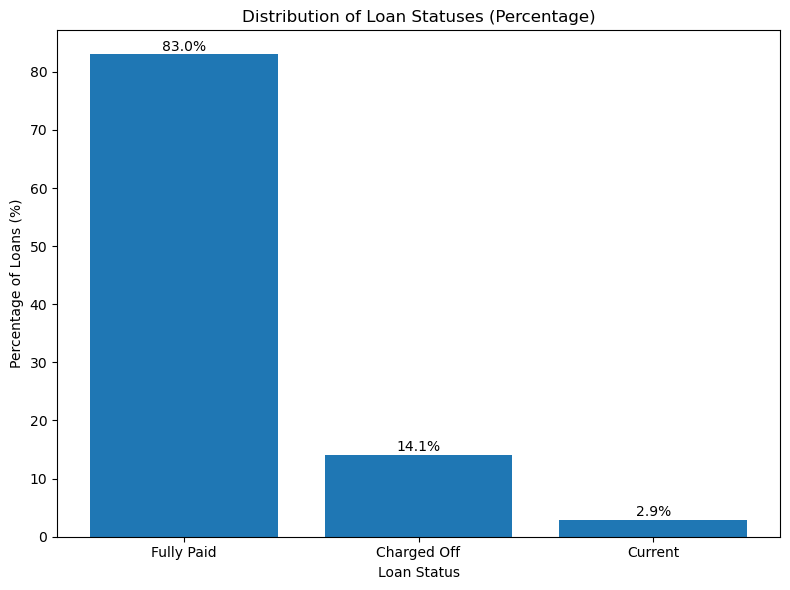

In [58]:
#Loan status Column
loan_status_counts = loan_data['loan_status'].value_counts()
total_loans = len(loan_data)  
loan_status_percentages = (loan_status_counts / total_loans) * 100
plt.figure(figsize=(8, 6))
plt.bar(loan_status_counts.index, loan_status_percentages)  # Use percentages for bar heights
plt.xlabel('Loan Status')
plt.ylabel('Percentage of Loans (%)')
plt.title('Distribution of Loan Statuses (Percentage)')
plt.xticks(rotation=0)
for i, v in enumerate(loan_status_percentages):
    plt.text(i, v + 0.1, f"{v:.1f}%", va='bottom', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

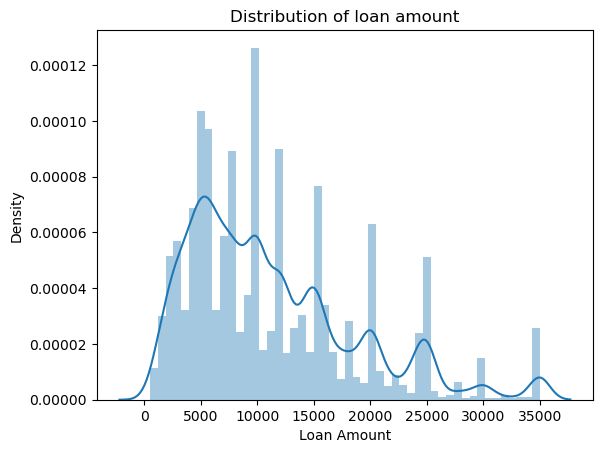

In [59]:
# Next Column - loan_amnt column
loan_data["loan_amnt"].head()
# Value_counts
loan_data["loan_amnt"].value_counts()

# They are mostly unique, Let us check how much loan amount mostly is considered by customers by a dist plot
# Univariate Analysis
sns.distplot(loan_data["loan_amnt"])

plt.xlabel("Loan Amount")
plt.ylabel("Density")
plt.title("Distribution of loan amount")
plt.show()


- Univariate Analysis - We can see from the above graph that the distribution of loan amount considered is high in b/w 5000 to 15000. This implies, borrowers applying for loan around this range.

term
 36 months    28350
 60 months    10618
Name: count, dtype: int64


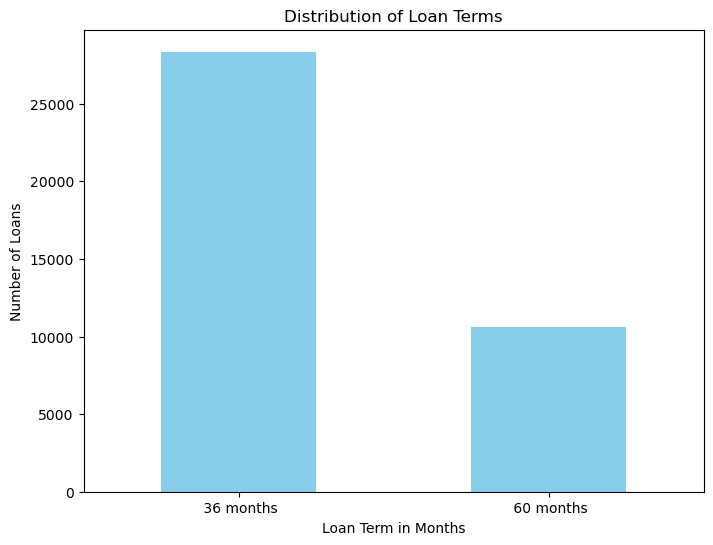

In [60]:
# Next Column - term
# Univariate Analysis
print(loan_data["term"].value_counts())
term_counts = loan_data['term'].value_counts()

plt.figure(figsize=(8, 6))
term_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Loan Term in Months')
plt.ylabel('Number of Loans')
plt.title('Distribution of Loan Terms')
plt.xticks(rotation = 0) #Rotated xticks, cause they are placed vertically
plt.show()


- Univariate Analysis - We can see that 36 months term have more distribution

int_rate
10.99%    956
13.49%    826
11.49%    825
7.51%     787
7.88%     725
         ... 
10.64%      1
20.52%      1
16.01%      1
16.33%      1
12.49%      1
Name: count, Length: 336, dtype: int64


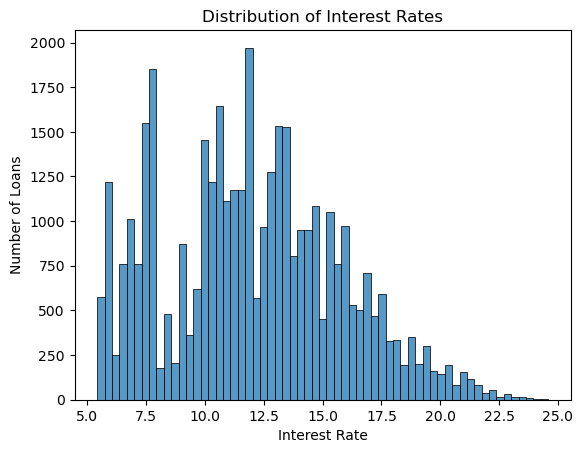

In [61]:
# Next Column - int_rate
print(loan_data["int_rate"].value_counts())

# Clean Data - removing percentage and converting it into float
loan_data["int_rate"] = loan_data["int_rate"].apply(lambda x : x.removesuffix("%")).astype(float)

# Univariate Analysis
sns.histplot(loan_data["int_rate"]) 
plt.xlabel("Interest Rate")
plt.ylabel("Number of Loans")
plt.title("Distribution of Interest Rates")
plt.show()

- We can see that from the graph, the number of loans given at the interest rate of 10-15%.

In [62]:
# Next Columnn - installment
# This column is related to loan_amnt, term and int_rate, hence skipping this column, installment = loan_amount * (int_rate/100) / term, assuming term is in years).
loan_data["installment"].value_counts()

installment
311.11    68
180.96    59
311.02    54
150.80    48
368.45    46
          ..
710.94     1
979.57     1
424.95     1
304.30     1
155.52     1
Name: count, Length: 14970, dtype: int64

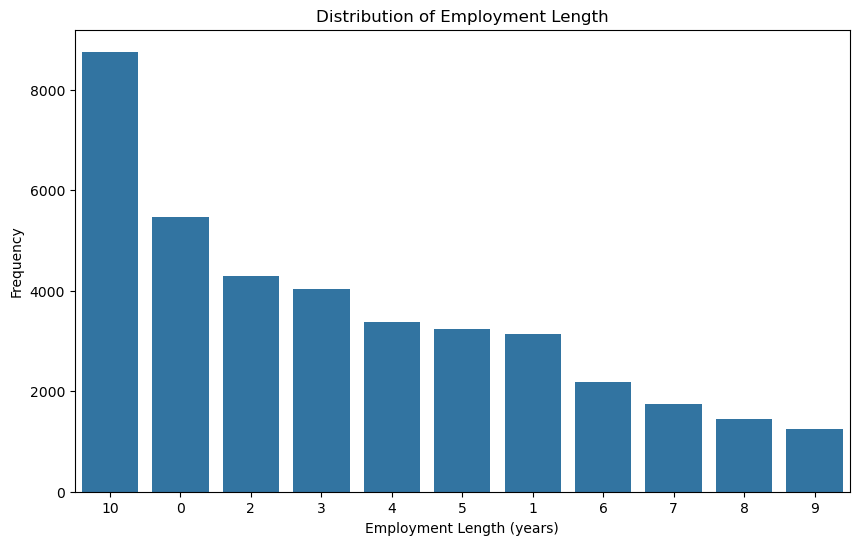

In [63]:
# Next Column - emp_length
plt.figure(figsize=(10, 6))
sns.countplot(x='emp_length', data=loan_data, order=loan_data['emp_length'].value_counts().index)
plt.title('Distribution of Employment Length')
plt.xlabel('Employment Length (years)')
plt.ylabel('Frequency')
plt.show()

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
4    Dec-11
Name: issue_d, dtype: object
object


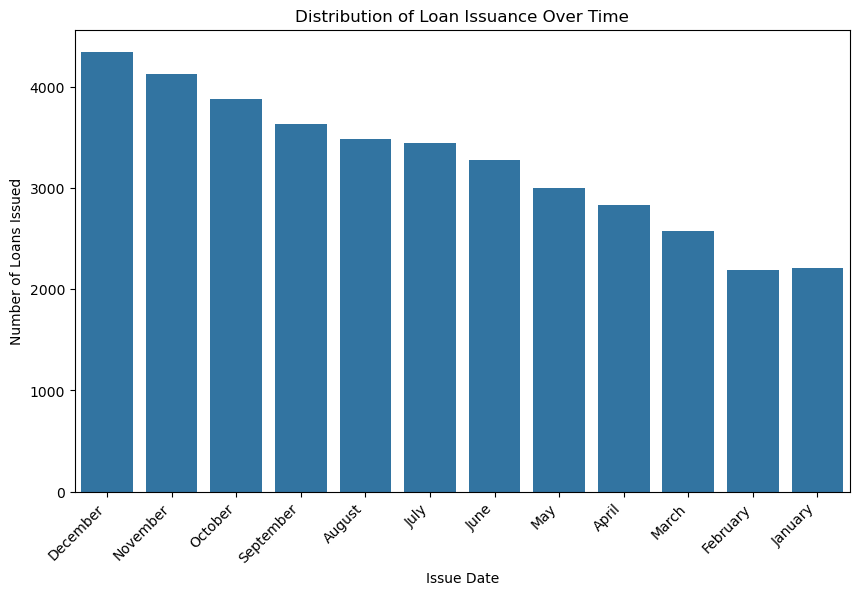

In [64]:
# Column - issue_d
print(loan_data["issue_d"].head())
print(loan_data["issue_d"].dtype)
# # Object convert to date time format
loan_data['issue_d'] = pd.to_datetime(loan_data['issue_d'], format='%b-%y')

# # Format is month and year
# # Let us consider in which month, the loan intake is more and calculate it
loan_data['issue_month'] = pd.DatetimeIndex(loan_data['issue_d']).month_name()
plt.figure(figsize=(10, 6))
sns.countplot(x=loan_data['issue_month'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Issue Date')
plt.ylabel('Number of Loans Issued')
plt.title('Distribution of Loan Issuance Over Time')
plt.show()


# Univariate Analysis Summary
- The highest number of loan applications are for loan amounts ranging from 5,000 to 15,000.
- Most applicants are offered interest rates between 5% to 16%, with some extending up to 22%.
- The majority of applicants have installment amounts around 20 dollars.
- The most common loan term chosen by applicants is 36 months.
- 10+ years of employement length have higher loan applications
- December month stands out first in loan taking month.

# Bivariate Analysis

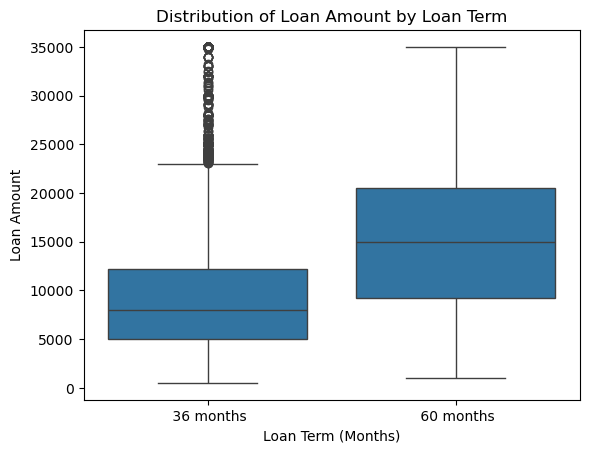

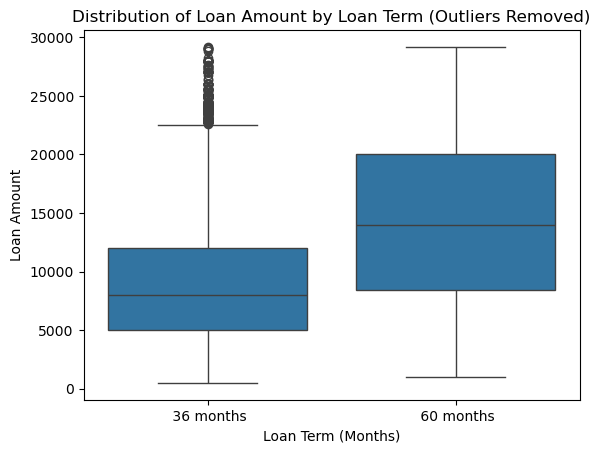

Before Outlier Removal:
count    38968.000000
mean     11250.504901
std       7472.971993
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

After Outlier Removal:
count    37738.000000
mean     10539.976284
std       6441.627436
min        500.000000
25%       5200.000000
50%       9600.000000
75%      15000.000000
max      29175.000000
Name: loan_amnt, dtype: float64


In [78]:
# Box plot b/w term and loan_amnt
sns.boxplot(x = "term", y = "loan_amnt", data=loan_data)
plt.xlabel("Loan Term (Months)")
plt.ylabel("Loan Amount")
plt.title("Distribution of Loan Amount by Loan Term")
plt.show()
Q1 = loan_data['loan_amnt'].quantile(0.25)
Q3 = loan_data['loan_amnt'].quantile(0.75)

# Calculating the interquartile range
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
trimmed_loan_data = loan_data[(loan_data['loan_amnt'] >= lower_bound) & (loan_data['loan_amnt'] <= upper_bound)]
sns.boxplot(x="term", y="loan_amnt", data=trimmed_loan_data)
plt.xlabel("Loan Term (Months)")
plt.ylabel("Loan Amount")
plt.title("Distribution of Loan Amount by Loan Term (Outliers Removed)")
plt.show()
print("Before Outlier Removal:")
print(loan_data['loan_amnt'].describe())

# Summary statistics after outlier removal
print("\nAfter Outlier Removal:")
print(trimmed_loan_data['loan_amnt'].describe())

- Bivariate Analysis - Plotted graph b/w loan amount and loan term, many outliers were there, as plotting b/w term and loan status.

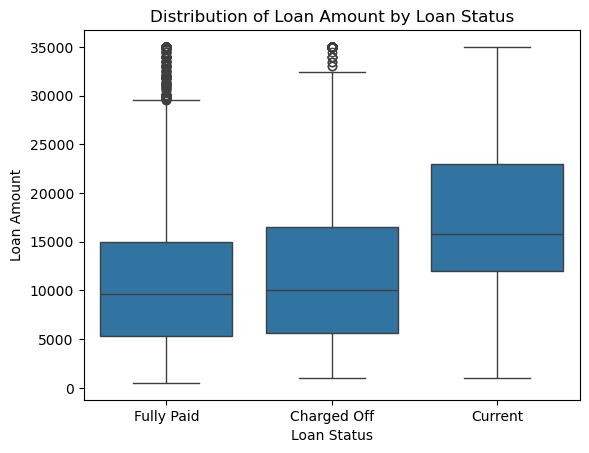

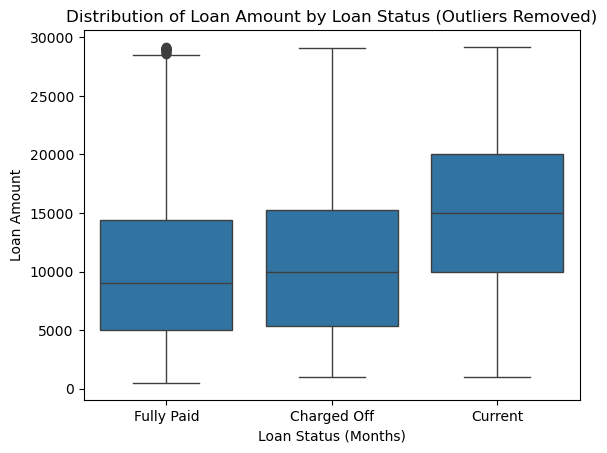

Before Outlier Removal:
count    38968.000000
mean     11250.504901
std       7472.971993
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


In [80]:
# Bivariate Analysis
# Box plot b/w loan_status and loan_amnt
sns.boxplot(x = "loan_status", y = "loan_amnt", data=loan_data)
plt.xlabel("Loan Status")
plt.ylabel("Loan Amount")
plt.title("Distribution of Loan Amount by Loan Status")
plt.show()

# Graph after removing outliers
sns.boxplot(x="loan_status", y="loan_amnt", data=trimmed_loan_data)
plt.xlabel("Loan Status (Months)")
plt.ylabel("Loan Amount")
plt.title("Distribution of Loan Amount by Loan Status (Outliers Removed)")
plt.show()
print("Before Outlier Removal:")
print(loan_data['loan_amnt'].describe())

- Bivariate Analysis - The median loan amounts for Fully Paid and Charged Off loans are similar, suggesting that the amount borrowed is not a clear differentiator between these two outcomes.

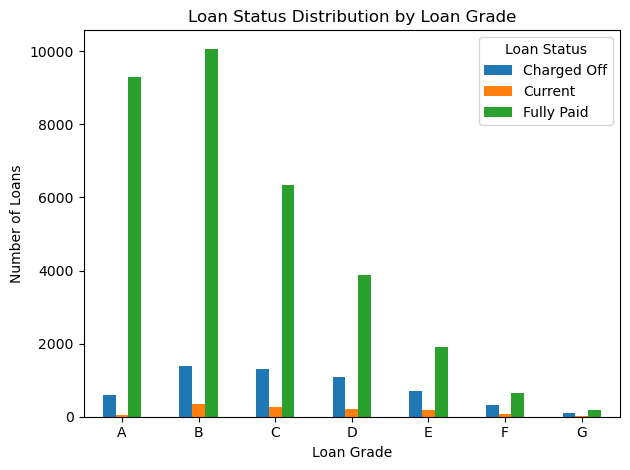

In [67]:
# Next Column - grade
loan_data["grade"].value_counts()
# Grouping the data by "grade" and "loan_status" and calculating the count of loans in each combination using .size(). 
# The .unstack() method transforms the resulting Series into a DataFrame for easier plotting
loan_status_by_grade = loan_data.groupby(['grade', 'loan_status']).size().unstack()

# Create the bar chart
loan_status_by_grade.plot(kind='bar')
plt.xlabel("Loan Grade")
plt.ylabel("Number of Loans")
plt.title("Loan Status Distribution by Loan Grade")
plt.legend(title="Loan Status")
plt.xticks(rotation=0)  # Rotating x-axis
plt.tight_layout()
plt.show()

- The Charged Off is high in the Grade B as we can see from the above graph

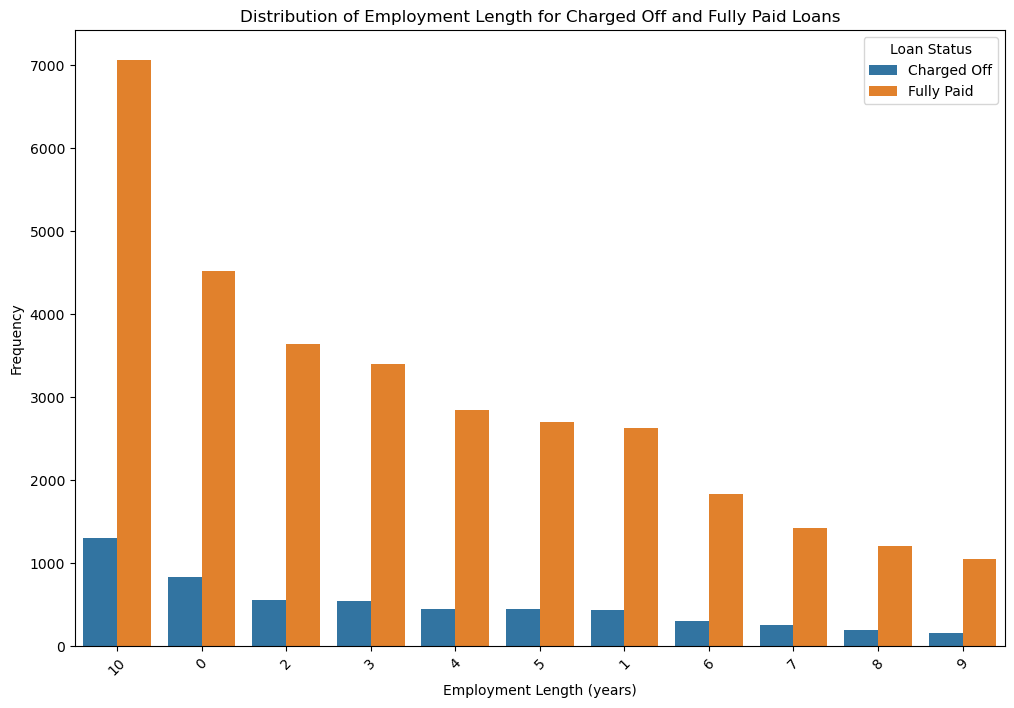

In [68]:
# Plotting the emp_length and loan_status, including only "Charged Off" and "Fully Paid" loan statuses
filtered_loan_data = loan_data[loan_data['loan_status'].isin(['Charged Off', 'Fully Paid'])]

plt.figure(figsize=(12, 8))
sns.countplot(x='emp_length', hue='loan_status', data=filtered_loan_data, order=filtered_loan_data['emp_length'].value_counts().index)
plt.title('Distribution of Employment Length for Charged Off and Fully Paid Loans')
plt.xlabel('Employment Length (years)')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Loan Status')
plt.show()

- We can see that mostly 10+ years of experience employer have chances to be defaulters and then next we have < 1 year experience borrowers.

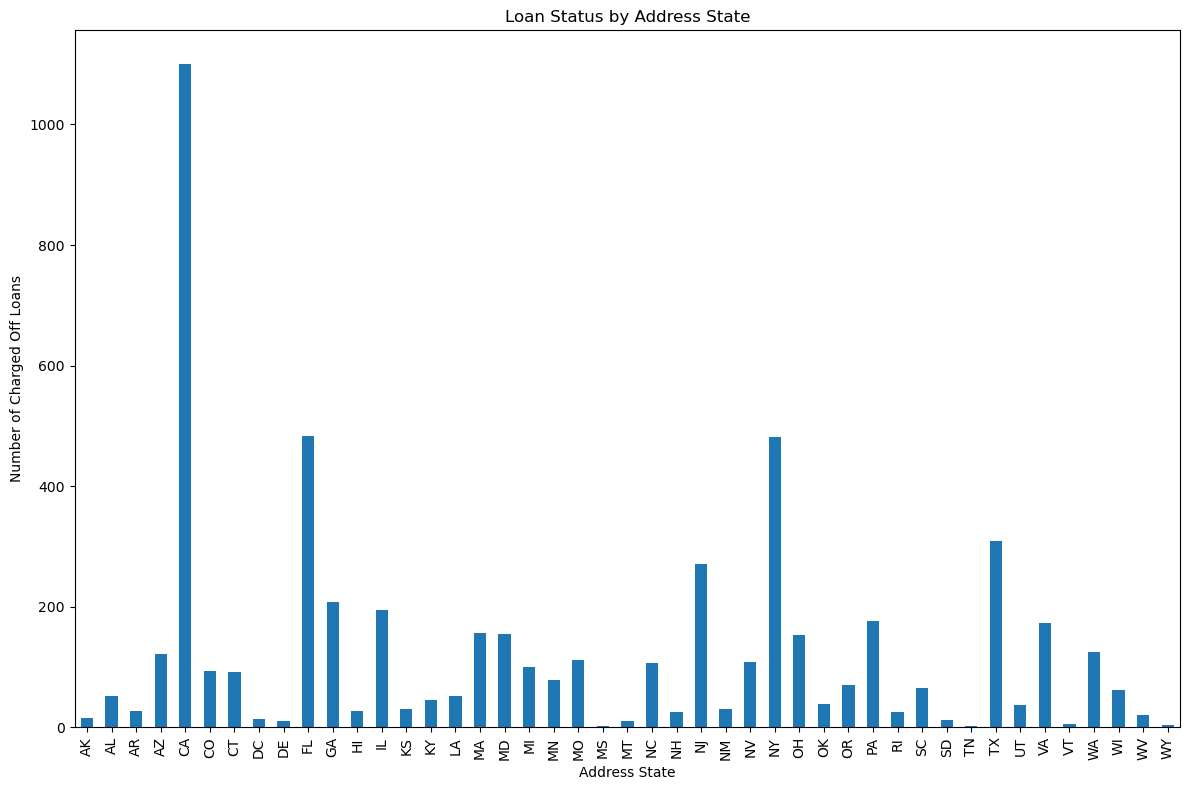

In [69]:
# Plotting b/w Address state and Number of charged_off loans
charged_off_data = loan_data[loan_data["loan_status"] == "Charged Off"]
grouped_data_addr_with_loan_status = charged_off_data.groupby(['addr_state']).size()
plt.figure(figsize=(12, 8))
grouped_data_addr_with_loan_status.plot(kind='bar')
plt.xlabel('Address State')
plt.ylabel('Number of Charged Off Loans')
plt.title('Loan Status by Address State')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

- We can see that, in the California state, we have higher charged off loans 

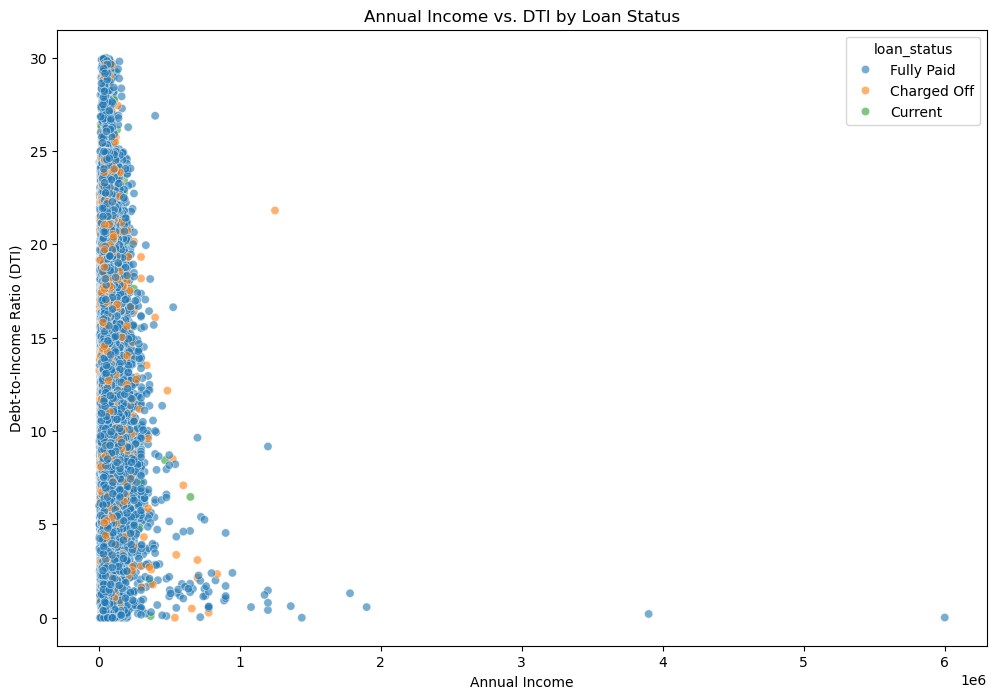

In [70]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=loan_data, x='annual_inc', y='dti', hue='loan_status', alpha=0.6)
plt.title('Annual Income vs. DTI by Loan Status')
plt.xlabel('Annual Income')
plt.ylabel('Debt-to-Income Ratio (DTI)')
plt.show()

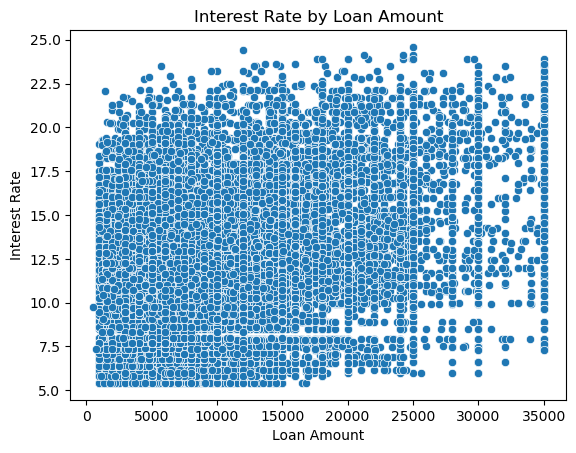

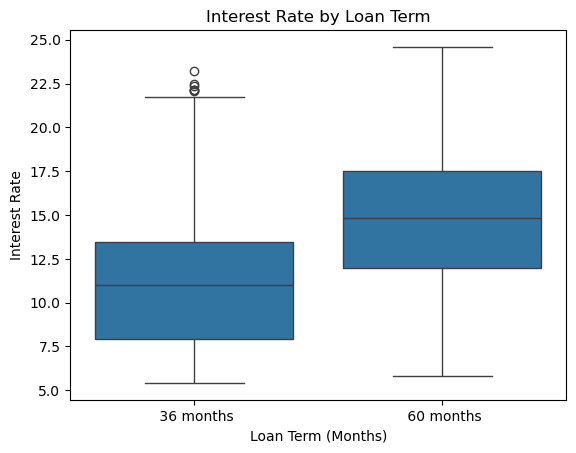

In [71]:
# This column will be related to the loan_amnt,term column
# Bivariate Analysis
sns.scatterplot(x = "loan_amnt", y = "int_rate", data=loan_data)
plt.xlabel("Loan Amount")
plt.ylabel("Interest Rate")
plt.title("Interest Rate by Loan Amount")
plt.show()

sns.boxplot(x = "term", y = "int_rate", data=loan_data)
plt.xlabel("Loan Term (Months)")
plt.ylabel("Interest Rate")
plt.title("Interest Rate by Loan Term")
plt.show()

- The scatter plot indicates that while loan amounts and interest rates are related, they do not have a strong linear relationship.
- It's difficult to say definitively from this image, but there might be a slight trend where interest rates for shorter loan terms (36 months) are lower compared to longer terms (60 months)


purpose
debt_consolidation    18336
credit_card            5030
other                  3875
home_improvement       2923
major_purchase         2162
small_business         1774
car                    1530
wedding                 927
medical                 682
moving                  572
house                   376
vacation                374
educational             304
renewable_energy        103
Name: count, dtype: int64


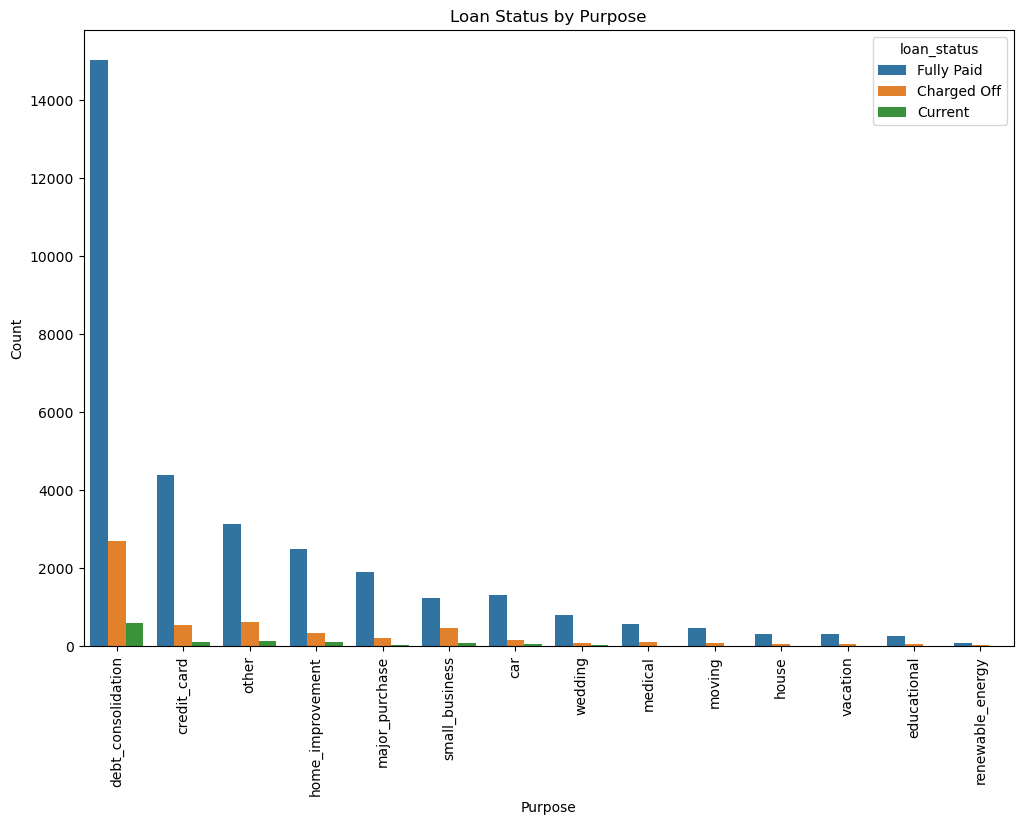

In [72]:
# Next Column Analysis - Purpose and loan_status column
print(loan_data["purpose"].value_counts())
plt.figure(figsize=(12, 8))
sns.countplot(x='purpose', hue='loan_status', data=loan_data, order=loan_data['purpose'].value_counts().index)
plt.title('Loan Status by Purpose')
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()



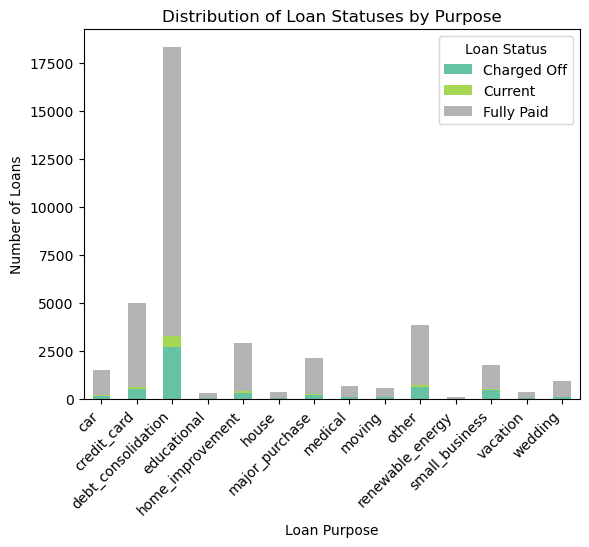

In [73]:
# Considering stacked bar for purpose colunmn
# Group data by purpose and count loan statuses
loan_purpose_status_counts = loan_data.groupby('purpose')['loan_status'].value_counts().unstack(fill_value=0)

# Create the stacked bar chart
loan_purpose_status_counts.plot(kind='bar', stacked=True, colormap='Set2')
plt.xlabel('Loan Purpose')
plt.ylabel('Number of Loans')
plt.title('Distribution of Loan Statuses by Purpose')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Loan Status') 
plt.show()

- There is huge difference in number of loans, here we can see debt consolidation is the purpose for many loans.


<Axes: xlabel='purpose'>

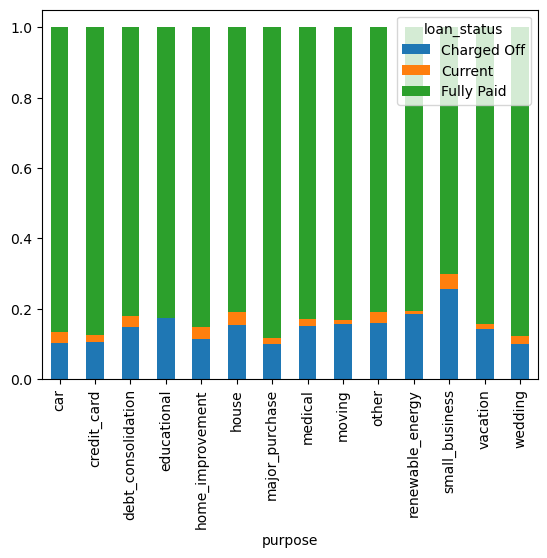

In [74]:
# Let's check with equalling all the pupose column
updated_stacked_bar = loan_purpose_status_counts[["Charged Off","Current","Fully Paid"]].apply(lambda x:x/x.sum(),axis=1)
updated_stacked_bar.plot(kind='bar',stacked=True)

- Here, in the above graph, we can see the small business has the high charged_off proportion

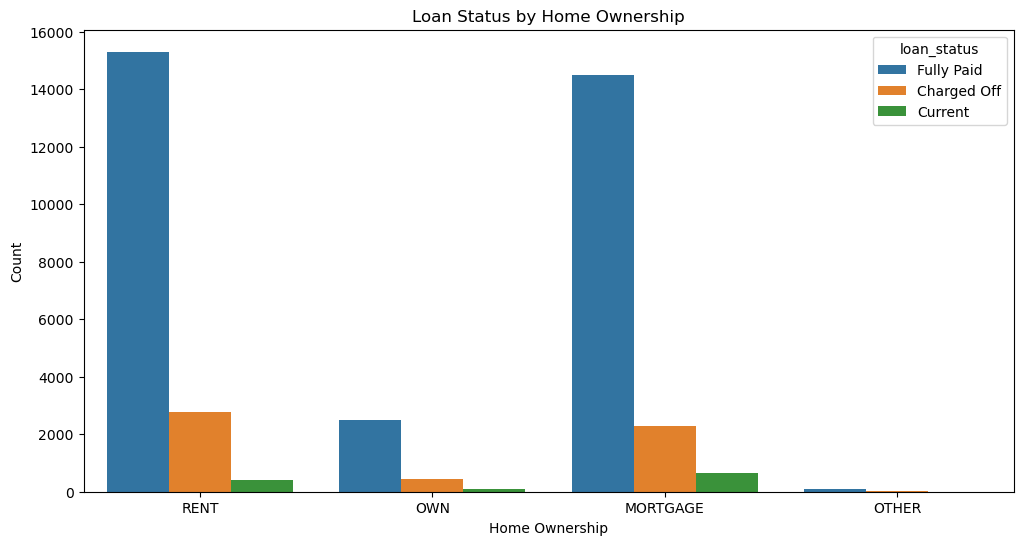

In [75]:
# Count Plot for home_ownership and loan_status
plt.figure(figsize=(12, 6))
sns.countplot(x='home_ownership', hue='loan_status', data=loan_data)
plt.title('Loan Status by Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.show()

- The above graph shows that there are mostly rented people and mortgage people, who took more loans and also couldn't pay off because of the same reason as we can see charged off count is high in those cases when compared to others.

<Figure size 1000x800 with 0 Axes>

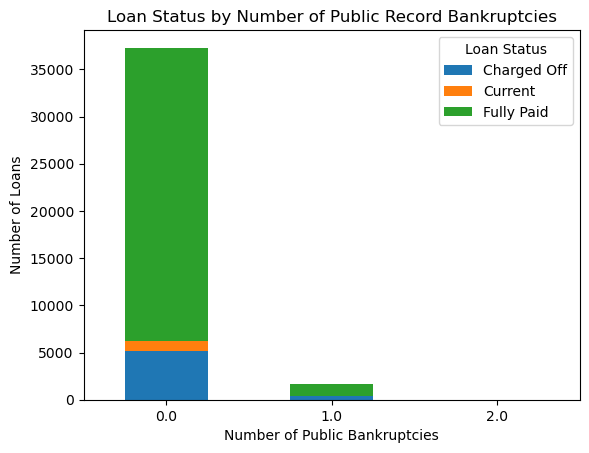

In [76]:
# Plotting b/w loans and public_rec_bankruptcies column
grouped_data = loan_data.groupby(['pub_rec_bankruptcies', 'loan_status']).size().unstack(fill_value=0)
plt.figure(figsize=(10, 8))
grouped_data.plot(kind='bar', stacked=True)
plt.xlabel('Number of Public Bankruptcies')
plt.ylabel('Number of Loans')
plt.title('Loan Status by Number of Public Record Bankruptcies')
plt.xticks(rotation=0)
plt.legend(title='Loan Status')
plt.show()

- Based on volumes, the number of charged offs are high in the category of 0 (no bankruptcy record)

# Bivariate Analysis Summary
- The majority of loan applications are categorized under Grade B.
- The most common homeowner statuses among applicants are Rent and Mortgage.
- The highest number of loan applications fall under the category of debt consolidation.
- The higher number of Charged Offs of borrowers fall under the category 0 of public record bankruptcies.
- The charged offs are high in state California.

# Multivariate Analysis

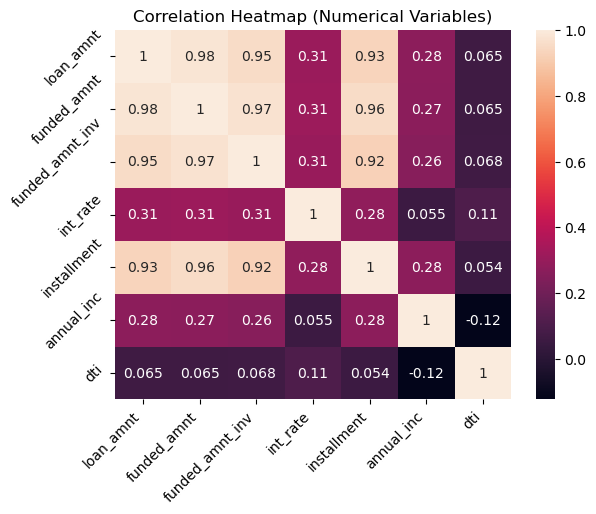

In [77]:
# Plotting a heatmap to understand correlation between numerical variables
numerical_features = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti']
sns.heatmap(loan_data[numerical_features].corr(),annot=True)
plt.title('Correlation Heatmap (Numerical Variables)')
plt.yticks(rotation=45, ha='right')
plt.xticks(rotation=45, ha='right') 
plt.show()


# Multivariate Analysis Summary
### Positive Correlations
- loan_amnt and funded_amnt (0.98):

These variables are highly correlated, indicating that the amount of the loan is almost equal to the amount funded.

- funded_amnt and funded_amnt_inv (1.00):

This perfect correlation suggests that the funded amount is equal to the funded amount invested, likely because these values are essentially the same in different contexts.

- loan_amnt and funded_amnt_inv (0.96):

This strong correlation is similar to the one above, reinforcing the relationship between loan amount and funded investment.

- loan_amnt and installment (0.93):

The loan amount is strongly related to the installment amount, which makes sense as larger loans generally require larger installments.

### Negative Correlation
- annual_inc and dti (-0.12):
This is a weak correlation and it suggests that as annual income increases, the DTI tends to decrease slightly, but the relationship is not strong.